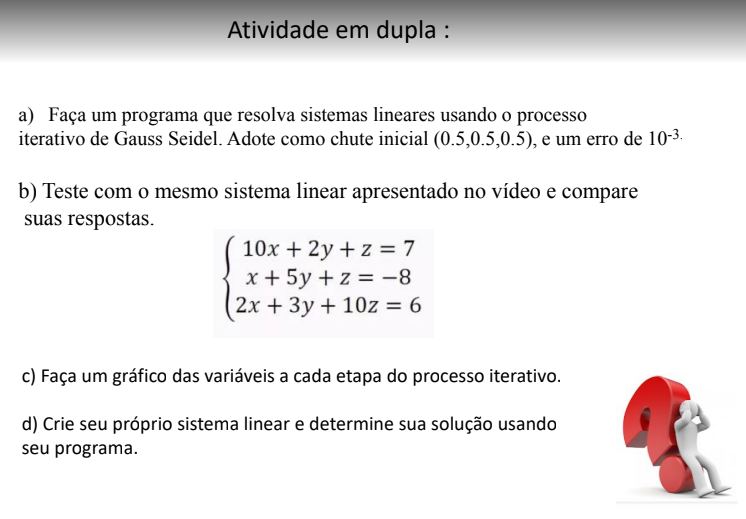

## Método numérico para LSP: Gauss-Seidel

In [43]:
from math import *

# isolando x, y e z
f1 = lambda y,z: (7 - 2*y - z)/10
f2 = lambda x,z: (-8 - x - z)/5
f3 = lambda x,y: (6 - 2*x - 3*y)/10

# chutes iniciais
x0, y0, z0 = 0.5, 0.5, 0.5
erro = 0.001
max_iter = 7

#listas de convergencia para plotar graficos
num_var=3
conv = [[0.5] for i in range(num_var)]
mse=[]

for i in range(max_iter):
    
    x1 = f1(y0,z0)
    y1 = f2(x1,z0)
    z1 = f3(x1,y1)
    print('%d\t%0.4f\t%0.4f\t%0.4f\n' %(i, x1,y1,z1))
    
    #calcula o erro
    e1 = abs(x0-x1);
    e2 = abs(y0-y1);
    e3 = abs(z0-z1);
    
    #adiciona erro quadratico medio na lista mse
    mse.append(e1**2 + e2**2 + e3**2)
    
    # atribui os novos valores às variaveis
    x0 = x1
    y0 = y1
    z0 = z1
    
    conv[0].append(x1)
    conv[1].append(y1)
    conv[2].append(z1)
    
    if e1<erro and e2<erro and e3<erro:
        break
    
print("\n \n Solução do sistema: ", x1,y1,z1)

print("\n \n Erro Quadrático Médio MSE: ", mse[-1])


0	0.5500	-1.8100	1.0330

1	0.9587	-1.9983	1.0078

2	0.9989	-2.0013	1.0006

3	1.0002	-2.0002	1.0000

4	1.0000	-2.0000	1.0000


 
 Solução do sistema:  1.0000321290328 -2.00000816239696 0.999996022912528

 
 Erro Quadrático Médio MSE:  5.431616539592486e-08


## Gráficos de convergência

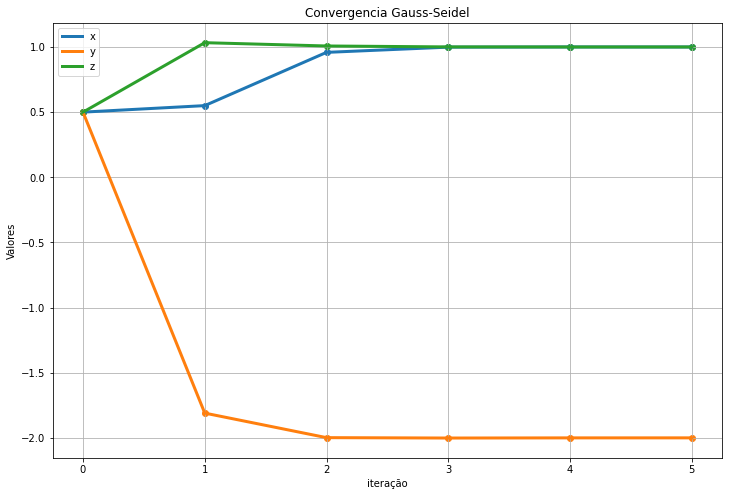

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.plot(range(len(conv[0])), conv[0], linewidth=3)
plt.plot(range(len(conv[1])),conv[1], linewidth=3)
plt.plot(range(len(conv[2])),conv[2], linewidth=3)

plt.scatter(range(len(conv[0])), conv[0])
plt.scatter(range(len(conv[1])),conv[1])
plt.scatter(range(len(conv[2])),conv[2])

plt.title("Convergencia Gauss-Seidel")
plt.xlabel("iteração")
plt.ylabel("Valores")

plt.legend(['x','y','z'])


plt.grid()

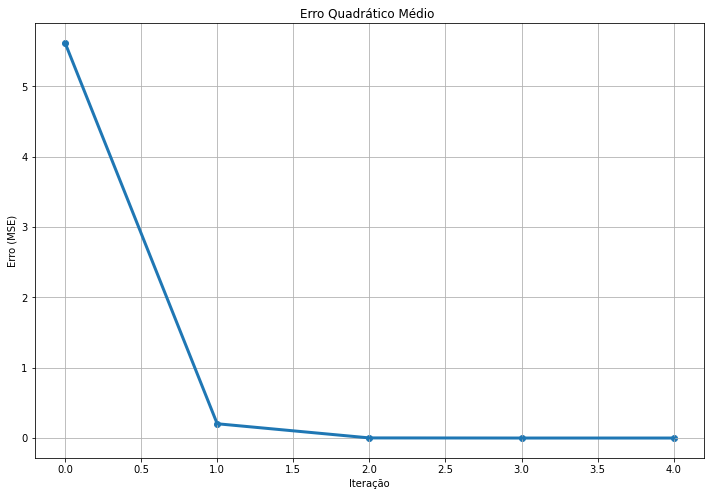

In [46]:
plt.figure(figsize=(12,8))

plt.plot(range(len(mse)), mse, linewidth=3)
plt.scatter(range(len(mse)), mse)

plt.title("Erro Quadrático Médio ")
plt.xlabel("Iteração")
plt.ylabel("Erro (MSE)")

plt.grid()